In [1]:
import pandas as pd 
import wandb
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_csv("cleaned data.csv")

In [3]:
data=data.drop('Unnamed: 0',axis=1)

In [4]:
x=data.drop('SalePrice',axis=1)
y=data['SalePrice']

In [5]:
data.shape

(1094, 29)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=7,max_depth=5,min_samples_leaf=2,min_samples_split=2,warm_start=True).fit(x_train,y_train)#7,5
print('Random forest')
print("test score",rf.score(x_test,y_test)*100)
print("train score",rf.score(x_train,y_train)*100)
pred=rf.predict(x_test)
rmse = mean_squared_error(y_test, pred)
print("rmse",rmse)



Random forest
test score 84.94419786005676
train score 91.09509450795777
rmse 745160044.6687315


In [20]:
# Assuming data.iloc[465] is already a DataFrame with one row
sample_df = x.iloc[[465]]  # Use double square brackets to keep it as DataFrame

# Predict
prediction = rf.predict(sample_df)

print(prediction)


[252586.22578459]


In [21]:
y.iloc[465]

343467.9499999998

In [16]:
data.iloc[465]

LotFrontage           0.594595
LotArea               0.685529
Neighborhood          6.000000
OverallQual           0.800000
YearBuilt             0.197802
YearRemodAdd          0.827586
RoofStyle             1.000000
MasVnrArea            0.000000
Foundation            2.000000
BsmtFinSF1            0.329231
TotalBsmtSF           0.302930
CentralAir            1.000000
Electrical            4.000000
1stFlrSF              1.000000
2ndFlrSF              1.000000
GrLivArea             1.000000
BsmtFullBath          0.000000
FullBath              1.000000
HalfBath              1.000000
BedroomAbvGr          1.000000
TotRmsAbvGrd          1.000000
Fireplaces            1.000000
GarageYrBlt           0.098765
GarageCars            0.500000
GarageArea            0.224359
WoodDeckSF            0.000000
OpenPorchSF           0.000000
SaleCondition         2.000000
SalePrice        343467.950000
Name: 465, dtype: float64

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
scoring = make_scorer(mean_squared_error, greater_is_better=False)
model = RandomForestRegressor(n_estimators=29, random_state=42)

k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform Cross-Validation
scores = cross_val_score(model, x, y, cv=kf, scoring='r2')

# Calculate and Display Results
print(f"Cross-Validation Scores (Negative MSE): {scores}")
print(f"Mean r**2: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Scores (Negative MSE): [0.88167679 0.88310151 0.90040013 0.84457829 0.89158877]
Mean r**2: 0.8803
Standard Deviation: 0.0191


In [ ]:
import joblib
import wandb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Variables to store the best model and best scores
best_r2 = -float('inf')  
best_mse = float('inf')  
best_mae = float('inf')  
best_model = None

def train_random_forest():
    global best_r2, best_mse, best_mae, best_model  # Use global variables to keep track of the best model

    # Initialize a new W&B run and create a new panel
    wandb.init(reinit=True)

    config = wandb.config

    # Split your data (replace x, y with your actual data variables)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = RandomForestRegressor(
        n_estimators=config.n_estimators,
        max_depth=config.max_depth,
        min_samples_split=config.min_samples_split,
        min_samples_leaf=config.min_samples_leaf
    ).fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate R², MSE, and MAE
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    wandb.log({'R2': r2, 'MSE': mse, 'MAE': mae})

    if r2 > best_r2:  
        best_r2 = r2
        best_mse = mse
        best_mae = mae
        best_model = model

sweep_config = {
    'method': 'random',
    'metric': {'name': 'R2', 'goal': 'maximize'},
    'parameters': {
        'n_estimators': {'values': [50, 100, 150, 200, 250]},
        'max_depth': {'values': [5, 10, 15, 20, 25]},
        'min_samples_split': {'values': [2, 5, 10]},
        'min_samples_leaf': {'values': [1, 2, 4]}
    }
}

# Initialize the sweep
sweep_id = wandb.sweep(sweep=sweep_config, project='random-forest-regression')

# Use the sweep to train the model
wandb.agent(sweep_id, function=train_random_forest, count=20)

# After the sweep, save the best model
if best_model is not None:
    joblib.dump(best_model, 'best_random_forest_model.pkl')
    print(f'Best model saved with R2: {best_r2}, MSE: {best_mse}, MAE: {best_mae}')


Create sweep with ID: 8vr7o3hw
Sweep URL: https://wandb.ai/omar74-000/random-forest-regression/sweeps/8vr7o3hw


wandb: Agent Starting Run: 045x51lt with config:
wandb: 	max_depth: 15
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 250
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,17042.35389
MSE,588100023.31819
R2,0.88118


wandb: Agent Starting Run: odkh6nnn with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,19308.39724
MSE,688704511.76067
R2,0.86085


wandb: Agent Starting Run: a2c8ip7l with config:
wandb: 	max_depth: 25
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 250
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,16615.66937
MSE,563358640.34726
R2,0.88617


wandb: Agent Starting Run: jsog2n7h with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,19506.53454
MSE,695901911.86738
R2,0.85939


wandb: Agent Starting Run: jax3y8ib with config:
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 150
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,17243.06428
MSE,604786480.96995
R2,0.8778


wandb: Agent Starting Run: 9e9pf0vj with config:
wandb: 	max_depth: 25
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,16977.21134
MSE,586252791.91886
R2,0.88155


wandb: Agent Starting Run: pgbf0g9a with config:
wandb: 	max_depth: 25
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 150
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,16596.33574
MSE,565684140.64549
R2,0.8857


wandb: Agent Starting Run: vjy7cu0j with config:
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 250
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,17042.12819
MSE,594297723.12952
R2,0.87992


wandb: Agent Starting Run: 6c9l24wc with config:
wandb: 	max_depth: 15
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 250
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,16942.45144
MSE,594606527.61806
R2,0.87986


wandb: Agent Starting Run: j6nilfdx with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,16921.76777
MSE,587623058.38707
R2,0.88127


wandb: Agent Starting Run: bcosl5b4 with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 250
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,16818.33882
MSE,583504953.80836
R2,0.8821


wandb: Agent Starting Run: vm2x0yct with config:
wandb: 	max_depth: 5
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,19647.35378
MSE,715358042.01585
R2,0.85546


wandb: Agent Starting Run: hhv1857x with config:
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,16744.97029
MSE,584895954.11584
R2,0.88182


wandb: Agent Starting Run: t8of5zrt with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,17450.54908
MSE,635963310.53353
R2,0.8715


wandb: Agent Starting Run: 91vix3vv with config:
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 150
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,17011.89898
MSE,597738480.02531
R2,0.87923


wandb: Agent Starting Run: 0lxowfos with config:
wandb: 	max_depth: 15
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,16950.20153
MSE,598106414.8678
R2,0.87915


wandb: Agent Starting Run: dzqobtxs with config:
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 4
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,16969.54893
MSE,582453823.95364
R2,0.88232


wandb: Agent Starting Run: n1dwwyhw with config:
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 150
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,16763.46139
MSE,581198104.96896
R2,0.88257


wandb: Agent Starting Run: ri095jbm with config:
wandb: 	max_depth: 25
wandb: 	min_samples_leaf: 1
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,16881.53951
MSE,604916880.73469
R2,0.87778


wandb: Agent Starting Run: tspktsjx with config:
wandb: 	max_depth: 25
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


MAE,▁
MSE,▁
R2,▁
MAE,16786.6081
MSE,578407793.36105
R2,0.88313


Best model saved with R2: 0.8861745703680813, MSE: 563358640.347261, MAE: 16615.669370240954


c:\Users\ACS\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 17, 2, 1] before, using random point [133, 18, 4, 3]
  warnings.warn(
c:\Users\ACS\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [50, 17, 2, 1] before, using random point [185, 10, 7, 1]
  warnings.warn(


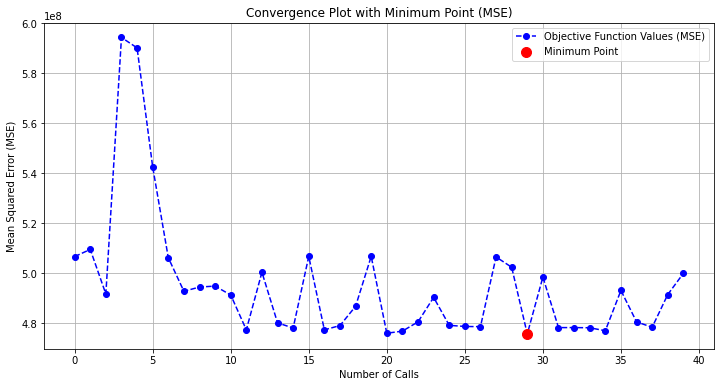

Best Parameters: [50, 17, 2, 1]
Best MSE: 475638790.6418


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skopt import gp_minimize
from skopt.space import Integer
from skopt.utils import use_named_args
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Define the search space
space = [
    Integer(50, 250, name='n_estimators'),
    Integer(5, 25, name='max_depth'),
    Integer(2, 10, name='min_samples_split'),
    Integer(1, 4, name='min_samples_leaf')
]

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Define the objective function that we want to minimize
@use_named_args(space)
def objective(**params):
    model.set_params(**params)
    # Perform cross-validation and return the mean squared error
    mse = -np.mean(cross_val_score(model, x, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error"))
    return mse

# Perform Bayesian optimization using Gaussian Process
res_gp = gp_minimize(objective, space, n_calls=40, random_state=42)

# Plot the convergence with MSE values
plt.figure(figsize=(12, 6))

# Plot all points
plt.plot(res_gp.func_vals, marker="o", linestyle="--", color="b", label="Objective Function Values (MSE)")

# Highlight the minimum point
min_idx = np.argmin(res_gp.func_vals)
plt.scatter(min_idx, res_gp.func_vals[min_idx], color="r", s=100, label="Minimum Point", zorder=5)

plt.title("Convergence Plot with Minimum Point (MSE)")
plt.xlabel("Number of Calls")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()

# Print the best parameters and corresponding MSE
print(f"Best Parameters: {res_gp.x}")
print(f"Best MSE: {res_gp.fun:.4f}")
